In [97]:
import pprint as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn')
sns.set(font_scale=1.2)

#### 1. 데이터 가져오기

In [98]:
#bike_path='~/data/data/bike-sharing-demand'
bike_path='./bike-sharing-demand'
train = pd.read_csv(os.path.join(bike_path, 'train.csv'))

In [99]:
type(train)

pandas.core.frame.DataFrame

In [100]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [101]:
# atemp 뜻: 체감온도.

#### 2. datetime 컬럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초까지 6가지 컬럼 생성하기

In [102]:
dtime_temp = pd.to_datetime(train['datetime'])
train['year']=dtime_temp.apply(lambda x:x.year)
train['month']=dtime_temp.apply(lambda x:x.month)
train['day']=dtime_temp.apply(lambda x:x.day)
train['hour']=dtime_temp.apply(lambda x:x.hour)
train['minute']=dtime_temp.apply(lambda x:x.minute)
train['second']=dtime_temp.apply(lambda x:x.second)


#### 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

sns.countplot 활용해서 시각화하기

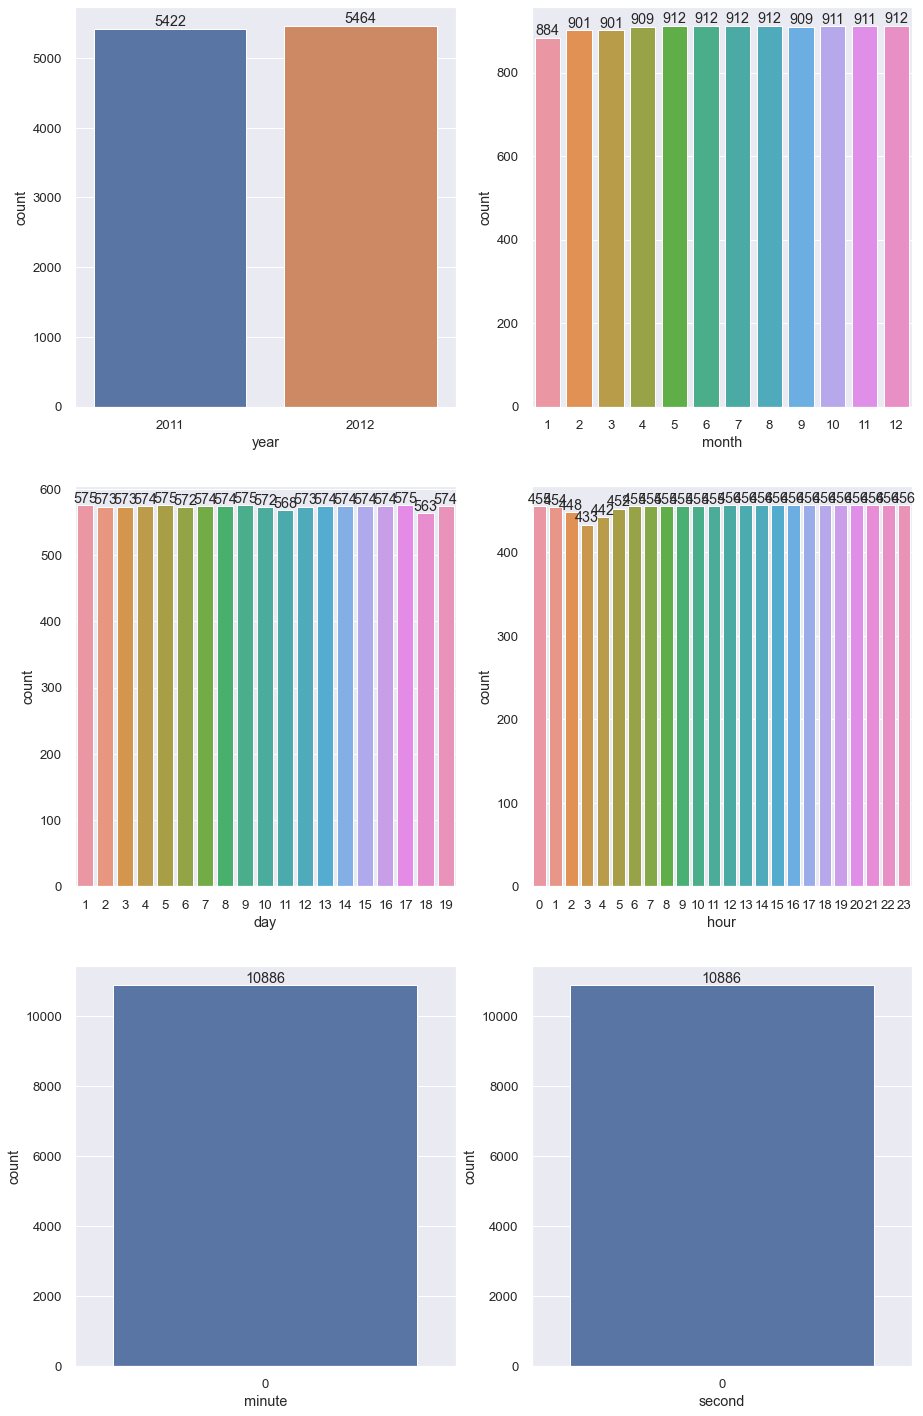

In [103]:
#fig, axes = plt.subplots(123, figsize=(24,12))
plt.figure(figsize=(15, 25))
ax = plt.subplot(3, 2, 1)
sns.countplot(data=train, x='year', ax=ax)
ax.bar_label(ax.containers[0])

ax = plt.subplot(3, 2, 2)
sns.countplot(data=train, x='month', ax=ax)
ax.bar_label(ax.containers[0])

ax = plt.subplot(3, 2, 3)
sns.countplot(data=train, x='day', ax=ax)
ax.bar_label(ax.containers[0])

ax = plt.subplot(3, 2, 4)
sns.countplot(data=train, x='hour', ax=ax)
ax.bar_label(ax.containers[0])

ax = plt.subplot(3, 2, 5)
sns.countplot(data=train, x='minute', ax=ax)
ax.bar_label(ax.containers[0])

ax = plt.subplot(3, 2, 6)
sns.countplot(data=train, x='second', ax=ax)
ax.bar_label(ax.containers[0])
plt.show()

#### 4. X, y 컬럼 선택 및 train/test 데이터 분리

X에는 어떤 데이터 컬럼을 넣어야 될까? casual, registered, minutes, second는 일단 빼고..   
year는 넣을까 뺼까?

In [104]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [119]:
y=train['count']
X=train.drop(columns=['count', 'casual', 'registered','datetime','minute','second'])

In [120]:
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

#### 5. LinearRegression 모델 학습

sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
random_seed=2022
model = LinearRegression(positive=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.2, random_state=random_seed)
model.fit(X_train, y_train)

LinearRegression(positive=True)

#### 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [122]:
# 예측값 생성
y_pred = model.predict(X_test)
y_pred

array([335.50879202, 188.50175251, 127.58996252, ..., 204.95085568,
       334.43064531, -42.28346186])

In [123]:
# 손실함수(MSE) 계산
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

21422.223123536383

In [125]:
# RMSE 값
rmse = mse ** 0.5
rmse


146.36332574636444

#### 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [127]:
# y 데이터 후처리
# 1. 0 이하인것은 0 으로 만들어주기
# 2. 데이터타입 float -> int

In [128]:
y_pred[y_pred<0]=0
y_pred = y_pred.round()
y_pred

array([336., 189., 128., ..., 205., 334.,   0.])

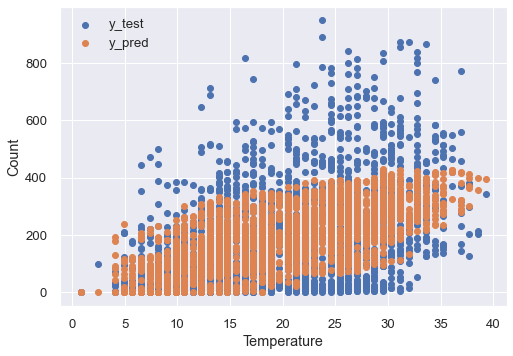

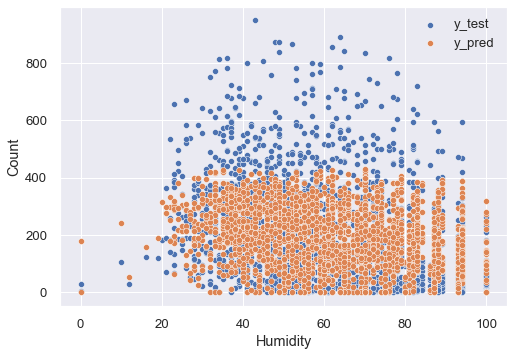

In [129]:
plt.scatter(x=X_test['temp'], y=y_test, label='y_test')
plt.scatter(x=X_test['temp'], y=y_pred, label='y_pred')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()
plt.show()


X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
ax = sns.scatterplot(data=X_test, x='humidity', y='y_test', label='y_test')
sns.scatterplot(data=X_test, x='humidity', y='y_pred', label='y_pred')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.show()


### 회고
* 재밌었던 점 
* 어려웠던 점 
* 궁금한점 
* 소감 


예측값이 사람 수인데 마이너스로 나와서 이것에 대해서 토의하는게 재밌었다. 최종 예측값을 뽑아내서 시각화나 저장을 할 때는 후처리로 정수화, 그리고 최소값 한계를 정해주었다. 모델을 평가할 때는 모델 자체의 성능이 잘 반영되도록 앞에서 한 후처리를 하지않는 것으로 토의를 결론지었다. 이 결론이 맞는 것인지 궁금하다.  
  
피쳐를 고르는게 어려웠다. 모든 행에 일관된 값이 들어있는 컬럼과 정답에 직접적인 단서를 주는 컬럼을 제거하는것은 쉽지만 컬럼간 상관관계를 보고 고르는건 어떤 기준을 세워야될지 모르겠다.  
  
궁금한 것은 피처값의 크기가 어느정도로 클때 정규화 전처리를 해주는가이다. 주택 가격 예측의 경우 몇십만 단위로 커진데다가 치우친 데이터분포를 갖고있어서 log 스케일링을 해줬는데 자전거 데이터셋에서는 데이터가 그만큼 크지 않으니 필요없을까?  

Exploration 노드들을 하면서 느끼는 점은 주어진 시간 내에 과제를 수행하기 위해서 중요한것과 아닌것을 구분하고, 중요한 코드들을 연습하고 변형해보고 적용하는 것에 집중해야겠다는 것이다. 중요하지 않은 코드들도 복습 차원에서 꼼꼼히 봐왔고 그게 시간을 많이 잡아먹었다. 시간 내에 해내는 연습을 앞으로의 노드들에서 계속해나갈것이다. 연습할 기회가 많이 주어져서 감사하다.

